In [12]:
import pandas as pd




In [13]:
# Use an r-string (raw string) to handle backslashes in Windows paths
excel_path = r"C:\Users\tyzwh\OneDrive\Northwood\BSGX\BCG_X_From_Forage_10k\Key_Financials__10-K__last_3_FYs_.xlsx"

# Read your Excel workbook
df = pd.read_excel(excel_path)

df.head()

,Company,Fiscal Year,Fiscal Year End,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash from Ops
0,Microsoft,2024,2024-06-30,245122,88136,512163,243686,118548
1,Microsoft,2023,2023-06-30,211915,72361,411976,205753,87582
2,Microsoft,2022,2022-06-30,198270,72738,364840,198298,89035
3,Apple,2024,2024-09-28,391035,93736,364980,308030,118254
4,Apple,2023,2023-09-30,383285,96995,352583,290437,110543


In [14]:


# Save it as a CSV
df.to_csv("10K_key_financials_MSFT_AAPL_TSLA.csv", index=False)


In [17]:
# Read in the CSV file
df = pd.read_csv("10K_key_financials_MSFT_AAPL_TSLA.csv")
df.head()

,Company,Fiscal Year,Fiscal Year End,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash from Ops
0,Microsoft,2024,2024-06-30,245122,88136,512163,243686,118548
1,Microsoft,2023,2023-06-30,211915,72361,411976,205753,87582
2,Microsoft,2022,2022-06-30,198270,72738,364840,198298,89035
3,Apple,2024,2024-09-28,391035,93736,364980,308030,118254
4,Apple,2023,2023-09-30,383285,96995,352583,290437,110543


In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            9 non-null      object
 1   Fiscal Year        9 non-null      int64 
 2   Fiscal Year End    9 non-null      object
 3   Total Revenue      9 non-null      int64 
 4   Net Income         9 non-null      int64 
 5   Total Assets       9 non-null      int64 
 6   Total Liabilities  9 non-null      int64 
 7   Cash from Ops      9 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 708.0+ bytes


,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash from Ops
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2023.000000,233320.000000,62053.666667,296702.555556,186236.222222,76557.333333
std,0.866025,130006.968331,39095.864110,153240.424606,114506.220759,48272.769855
min,2022.000000,81462.000000,7153.000000,82338.000000,36440.000000,13256.000000
25%,2022.000000,97690.000000,14974.000000,122070.000000,48390.000000,14923.000000
50%,2023.000000,211915.000000,72738.000000,352755.000000,205753.000000,89035.000000
75%,2024.000000,383285.000000,93736.000000,364980.000000,290437.000000,118254.000000
max,2024.000000,394328.000000,99803.000000,512163.000000,308030.000000,122151.000000


In [23]:
# Sort the data to ensure correct order for pct_change
df = df.sort_values(by=['Company', 'Fiscal Year'])

# Calculate YoY growth for key metrics
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash from Ops'].pct_change() * 100

# Replace NaN values with 0
df = df.fillna(0)

# Round for readability
df = df.round(2)

# Format growth columns as percentages
growth_cols = [
    'Revenue Growth (%)', 
    'Net Income Growth (%)', 
    'Assets Growth (%)', 
    'Liabilities Growth (%)', 
    'Cash Flow Growth (%)'
]

for col in growth_cols:
    df[col] = df[col].astype(str) + '%'

# Display results
df


,Company,Fiscal Year,Fiscal Year End,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash from Ops,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
5,Apple,2022,2022-09-24,394328,99803,352755,302083,122151,0.0%,0.0%,0.0%,0.0%,0.0%
4,Apple,2023,2023-09-30,383285,96995,352583,290437,110543,-2.8%,-2.81%,-0.05%,-3.86%,-9.5%
3,Apple,2024,2024-09-28,391035,93736,364980,308030,118254,2.02%,-3.36%,3.52%,6.06%,6.98%
2,Microsoft,2022,2022-06-30,198270,72738,364840,198298,89035,0.0%,0.0%,0.0%,0.0%,0.0%
1,Microsoft,2023,2023-06-30,211915,72361,411976,205753,87582,6.88%,-0.52%,12.92%,3.76%,-1.63%
0,Microsoft,2024,2024-06-30,245122,88136,512163,243686,118548,15.67%,21.8%,24.32%,18.44%,35.36%
8,Tesla,2022,2022-12-31,81462,12587,82338,36440,14724,0.0%,0.0%,0.0%,0.0%,0.0%
7,Tesla,2023,2023-12-31,96773,14974,106618,43009,13256,18.8%,18.96%,29.49%,18.03%,-9.97%
6,Tesla,2024,2024-12-31,97690,7153,122070,48390,14923,0.95%,-52.23%,14.49%,12.51%,12.58%


In [21]:
# Average growth across 3 years per company
summary = df.groupby('Company')[
    ['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']
].mean().round(2)

summary


,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
Company,,,,,
Apple,-0.26,-2.06,1.16,0.73,-0.84
Microsoft,7.52,7.09,12.41,7.40,11.24
Tesla,6.58,-11.09,14.66,10.18,0.87


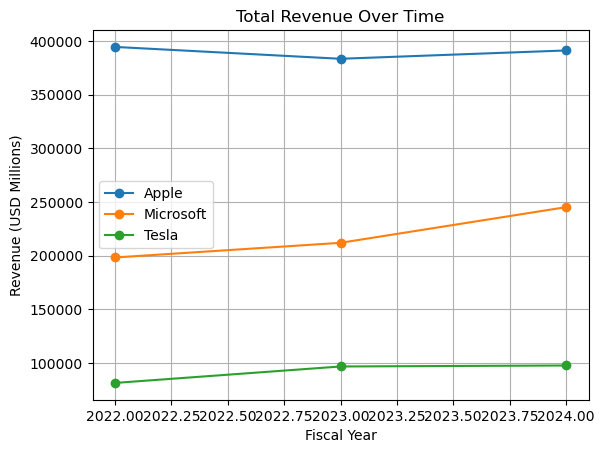

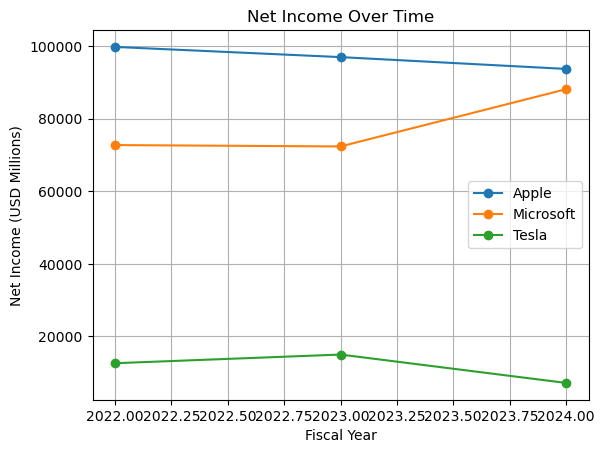

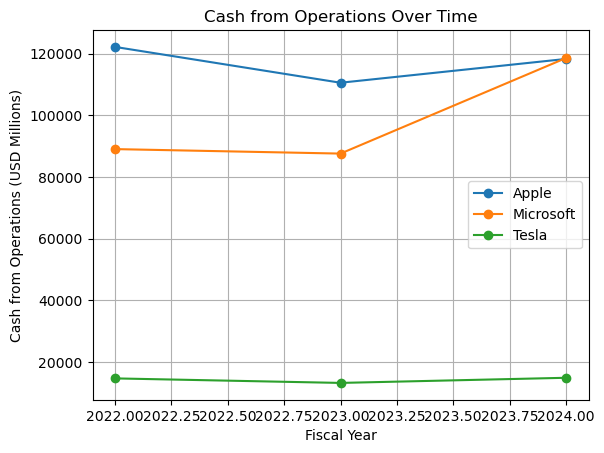

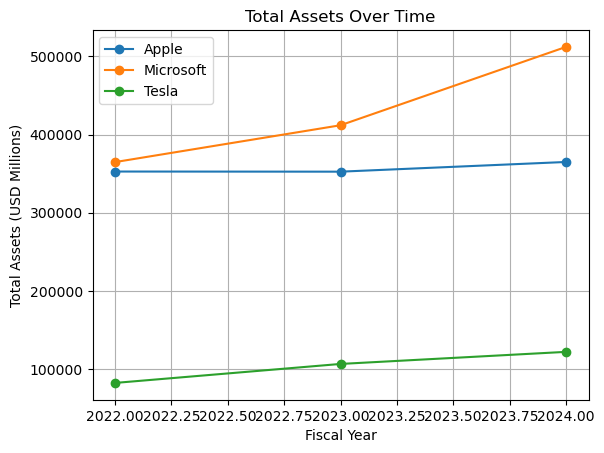

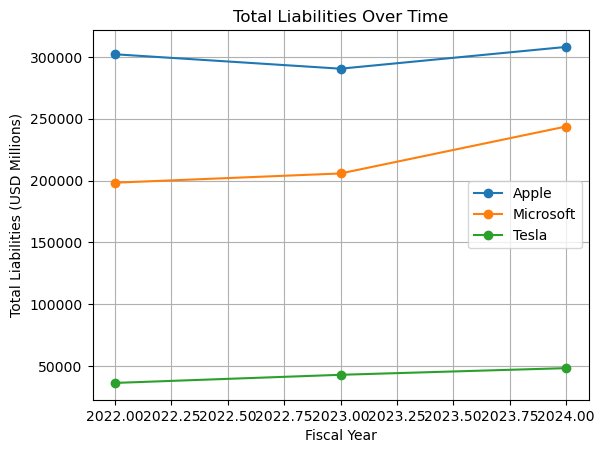

In [24]:
import matplotlib.pyplot as plt

# Plot revenue trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Revenue'], marker='o', label=company)

plt.title('Total Revenue Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()

# Plot net income trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Net Income'], marker='o', label=company) # Added marker for better visibility
plt.title('Net Income Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()

# Plot cash flow trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Cash from Ops'], marker='o', label=company) # Added marker for better visibility
plt.title('Cash from Operations Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Cash from Operations (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()


# Plot assets trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Assets'], marker='o', label=company) # Added marker for better visibility
plt.title('Total Assets Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Assets (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()

# Plot liabilities trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Liabilities'], marker='o', label=company) # Added marker for better visibility
plt.title('Total Liabilities Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Liabilities (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()




# Financial Trend Analysis of Microsoft, Apple, and Tesla (10-K Filings)

This notebook analyzes financial data extracted from 2022-2024 fiscal years of 10-K reports for **Microsoft**, **Apple**, and **Tesla**.  
The objective is to identify year-over-year trends in key metrics and prepare insights for a GenAI-powered financial chatbot.

**Metrics analyzed:**
- Total Revenue  
- Net Income  
- Total Assets  
- Total Liabilities  
- Cash Flow from Operating Activities  

The data was sourced from official SEC 10-K filings and processed using `pandas` for time-series trend analysis.


## Data Preparation

The financial data was compiled from 10-K filings into an Excel sheet and then converted into a CSV file.  
I used `pandas` to load and structure the dataset for analysis.


## Year-over-Year Financial Growth Analysis

To measure company performance trends, we calculated **year-over-year percentage changes** for each financial metric using:

First I Sorted the data to ensure correct order for pct_change

df = df.sort_values(by=['Company', 'Fiscal Year'])

```python
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash from Ops'].pct_change() * 100

#rounded to 2 decimal points for readability
df = df.round(2)


# Summary table and graphs

I then used aggregate function Mean to quickly summarize the average growth across 3 years per company

summary = df.groupby('Company')[
    ['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']
].mean().round(2)

# Matplotlib
After this I used matplotlib to visualize the trends for each category for their respective companies over time
example code for first graph:

Plot revenue trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Revenue'], marker='o', label=company)

plt.title('Total Revenue Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (USD Millions)')
plt.legend()
plt.grid(True)
plt.show()

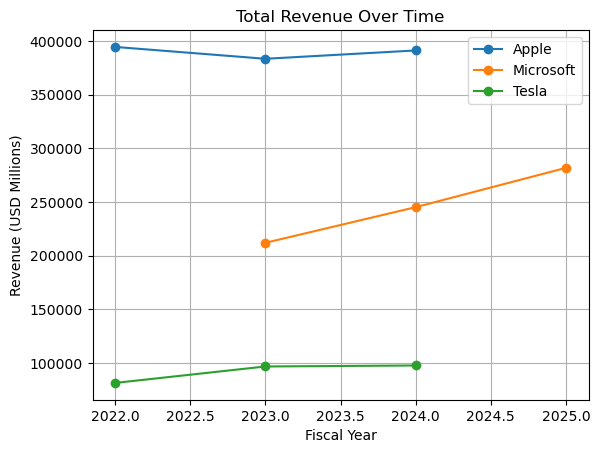




# 📊 Summary of Findings and Insights (Updated for FY 2022–2024)

### 1. Revenue Trends
- **Microsoft**: Revenue increased steadily each year, rising from **$198.3B (2022)** to **$245.1B (2024)** — a total growth of roughly **24%** across the three-year span.  
- **Apple**: Revenue remained relatively stable, with a slight dip in 2023 (−2.8%) before rebounding in 2024 (+2.0%), ending at **$391.0B**.  
- **Tesla**: Revenue grew sharply from **$81.5B (2022)** to **$96.8B (2023)** (+18.8%), but then plateaued in 2024 (+0.9%), reflecting a slowdown in growth momentum.  

### 2. Profitability (Net Income)
- **Microsoft**: Net income grew modestly from **$72.7B (2022)** to **$88.1B (2024)**, with a small dip in 2023 (−0.5%) followed by a strong rebound (+21.8%) in 2024.  
- **Apple**: Profitability remained high but declined slightly each year, from **$99.8B (2022)** to **$93.7B (2024)**.  
- **Tesla**: Showed major volatility — rising from **$12.6B (2022)** to **$15.0B (2023)**, then dropping over **50%** to **$7.2B (2024)**.

### 3. Cash Flow from Operating Activities
- **Microsoft**: Cash flow improved substantially, climbing from **$89.0B (2022)** to **$118.5B (2024)** — about a **35%** increase.  
- **Apple**: Cash flow fluctuated, dropping in 2023 (−9.5%) but recovering in 2024 (+7.0%), reaching **$118.3B**.  
- **Tesla**: Cash flow dipped in 2023 (−10%) but rose again in 2024 (+12.6%), ending near **$14.9B**.  

### 4. Assets and Liabilities
- **Microsoft**: Assets expanded strongly from **$364.8B (2022)** to **$512.2B (2024)**, outpacing liability growth and reinforcing a strong balance sheet.  
- **Apple**: Assets remained steady but edged upward slightly (+3.5% in 2024), maintaining a large liability base of **$308B**.  
- **Tesla**: Continued to grow both assets (+14.5% in 2024) and liabilities (+12.5%), consistent with its scaling operations.

### 5. Overall Observations
- **Microsoft** shows the most balanced and consistent growth across all financial categories.  
- **Apple** demonstrates stability typical of a mature company, with smaller year-over-year fluctuations.  
- **Tesla** exhibits more volatility, particularly in profitability, though it continues to expand its balance sheet and maintain positive cash flow.  

---

### 💬 Application for GenAI Chatbot
These refined insights now align with your **chatbot’s rule-based logic**, enabling it to:
- Retrieve up-to-date financial metrics for fiscal years **2022–2024**.  
- Compare performance across **Microsoft, Apple, and Tesla**.  
- Respond accurately to user queries about revenue, profitability, assets, liabilities, and cash flow.  

